# LR estimation

We estimate a suitable learning rate by training each model with a learning rate that exponentially increases in every epoch.
We start with a learning rate of 1e-7 and increase it by multiplying it with factor 1.4.
By plotting the training loss against the learning rate, we identify the most suitable learning rate as the point where the curve shows the steepest descent, meaning the model learns best.

Note that for all sequential models we use teacher forcing without scheduled sampling for a fair comparison between learning rates.

In [67]:
import numpy as np
import os.path as osp
from matplotlib import pyplot as plt
import glob

In [79]:
base_dir = '/home/fiona/birdMigration/results'
years = [2015, 2016, 2017]

In [102]:
def load_lr_estimation(year, model, ext=''):

    model_dir = osp.join(base_dir, f'nested_cv_{model}', f'test_{year}', 
                          f'LR_estimation{ext}')
    lr_files = glob.glob(model_dir + f"/**/learning_rates.npy", recursive = True)
    lr, loss = [], []
    for f in lr_files:
        lr.append(np.load(f))
        loss.append(np.load(osp.join(osp.dirname(f), 'training_curves.npy'))[0])
    lr = np.stack(lr)
    loss = np.stack(loss)
    
    return lr, loss

def plot_loss(years, model, ext=''):
    fig, ax = plt.subplots(1, len(years), figsize=(6*len(years), 4))
    for i, y in enumerate(years):
        lr, loss = load_lr_estimation(y, model, ext)
        ax[i].plot(lr.mean(0), loss.mean(0), '-o')
        ax[i].fill_between(lr.mean(0), (loss.mean(0) - loss.std(0)), (loss.mean(0) + loss.std(0)))
        ax[i].set(xscale='log', yscale='log', xlabel='learning rate')
        if i==0:
            ax[i].set_ylabel('loss')
        ax[i].set_title(f'test year = {y}')
    return fig

def plot_gradient(years, model, ext='', stop=-10):
    fig, ax = plt.subplots(1, len(years), figsize=(6*len(years), 4))
    for i, y in enumerate(years):
        lr, loss = load_lr_estimation(y, model, ext)
        ax[i].plot(lr.mean(0)[:stop], np.gradient(loss.mean(0))[:stop], '-o')
        ax[i].set(xscale='log', xlabel='learning rate')
        if i==0:
            ax[i].set_ylabel('gradient')
        ax[i].set_title(f'test year = {y}')
    return fig

## FluxGraphLSTM
### With 0 graph layers

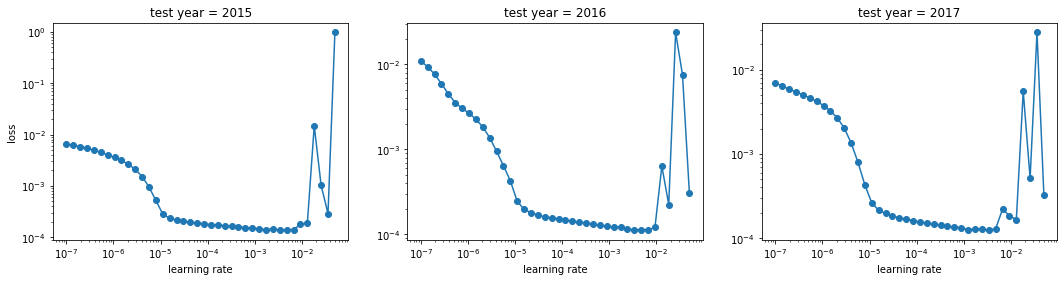

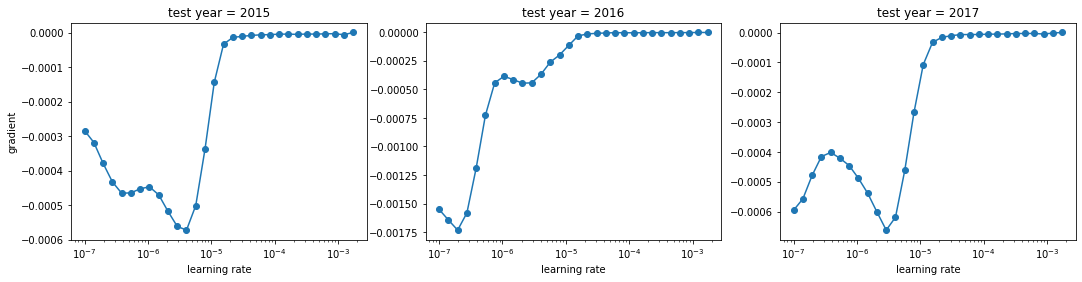

In [101]:
fig = plot_loss(years, 'FluxGraphLSTM', ext = '_0')
fig = plot_gradient(years, 'FluxGraphLSTM', ext = '_0', stop=-10)

For all three test years, we see a minimum in the loss curve around learning rates between 1e-6 and 1e-5. 
For 2016, the global minimum is between 1e-7 and 1e-6. However, based on visual inspection of the loss curve and the fact that this doesn't occur for the other years,
we conclude that a learning rate of 5e-6 seems to be a good choice for this model.

### With 2 graph layers

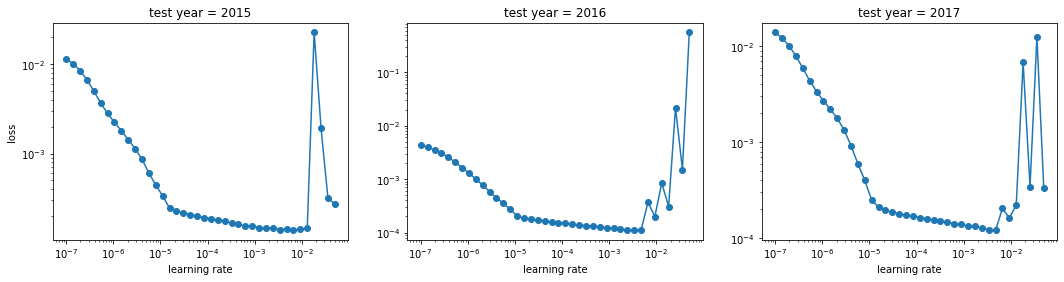

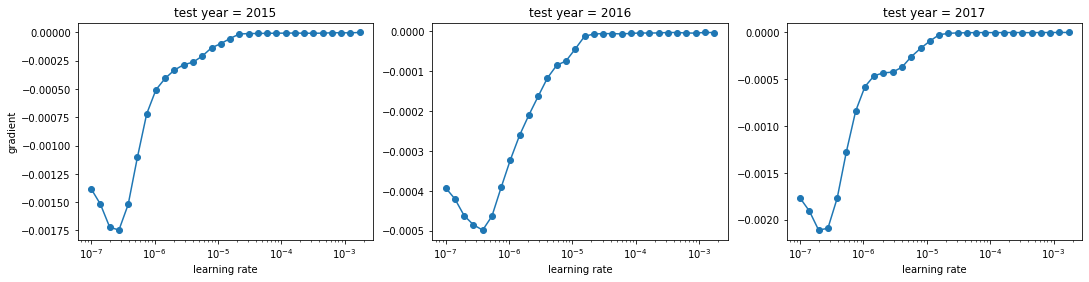

In [97]:
fig = plot_loss(years, 'FluxGraphLSTM', ext = '_2')
fig = plot_gradient(years, 'FluxGraphLSTM', ext = '_2', stop=-10)

For all three test years, we see a minimum in the loss curve around learning rates between 1e-7 and 1e-6. 
Therefore, we conclude that a learning rate of 5e-7 seems to be a good choice for this model.